# Week 3

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import rebound
import time

# 1.

-0.001 0.0 0.0
0.999 0.0 0.0
<rebound.Orbit instance, a=1.0 e=0.0 inc=0.0 Omega=0.0 omega=0.0 f=0.0>
6.283185307179586


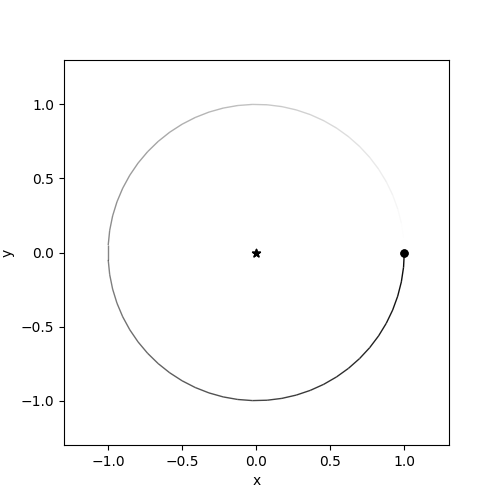

In [11]:
%matplotlib widget

# set up parameters for star #2
mu2 = .001

# set up parameters for star #1
mu1 = 1 - mu2 

# set up parameters for third body
mu3 = .0001


# set up the simulation
sim = rebound.Simulation()
sim.add(m=mu1)                            # first body
sim.add(m=mu2, a=1, e=0)                  # second body
#sim.add(m=mu3, x=0.5-mu2, y=np.sqrt(3)/2, vx=0, vy=0) # third body
sim.move_to_com()

# plot the positions and instantaneous orbit
op = rebound.OrbitPlot(sim, periastron=False)

# output info about the particles and the orbit
for p in sim.particles:
    print(p.x, p.y, p.z)
for o in sim.orbits(): 
    print(o)
    print(o.P)

In [12]:
p_orb = sim.orbits()[0].P

Noutputs = 200
times = np.linspace(0, 2*p_orb, Noutputs)

n = 2*np.pi/o.P # mean motion
tau = 0 # time of pericentre passage

M = np.zeros(Noutputs)

# particle 1
xvec1 = np.zeros(Noutputs)
yvec1 = np.zeros(Noutputs)

vxvec1 = np.zeros(Noutputs)
vyvec1 = np.zeros(Noutputs)

xvec1[0] = sim.particles[0].x
yvec1[0] = sim.particles[0].y
op1, = plt.plot(xvec1[:1], yvec1[:1])

# particle 2; in the still reference frame 

vxvec2 = np.zeros(Noutputs)
vyvec2 = np.zeros(Noutputs)

xvec2 = np.zeros(Noutputs)
yvec2 = np.zeros(Noutputs)

xvec2[0] = sim.particles[1].x
yvec2[0] = sim.particles[1].y

op2, = plt.plot(xvec2[:1], yvec2[:1])


for i, t in enumerate(times):
    # integrate the next part of the orbit
    op.sim.integrate(t)

    M[i] = n*(t - tau)
    
    # store the trajectory of particle 1 (index 0)
    xvec1[i] = sim.particles[0].x
    yvec1[i] = sim.particles[0].y

    vxvec1[i] = sim.particles[0].vx
    vyvec1[i] = sim.particles[0].vy

    # store the trajectory of particle 2 (index 1)
    xvec2[i] = sim.particles[1].x
    yvec2[i] = sim.particles[1].y

    vxvec2[i] = sim.particles[1].vx
    vyvec2[i] = sim.particles[1].vy


    # update the plot to animate it
    op.update() # can use updateLimits=True if you want to dynamically update the plot limits
    
    op1.set_data((xvec1[:i+1],yvec1[:i+1])) # plot the trajectory so far
    op2.set_data((xvec2[:i+1],yvec2[:i+1])) 
    
    time.sleep(0.001)
    op.fig.canvas.draw()

In [7]:
lat_space = np.linspace(0, np.pi, 1000)
P2 = 0.5*(3*np.cos(lat_space)**2 - 1)

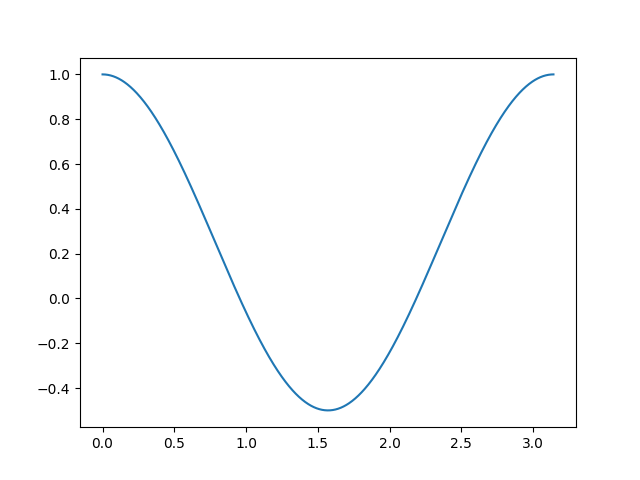

In [13]:
plt.close('all')
plt.plot(lat_space, P2)

# 2.

a)

0.0007386086966925292 -2.0239671650579014e-19 0.0
0.9157386086966925 -2.0239671650579014e-19 0.0
-1.6543473053892215 2.025991132222959e-16 0.0
<rebound.Orbit instance, a=0.9150000000000001 e=1.6452575339369286e-16 inc=0.0 Omega=0.0 omega=0.0 f=0.0>
0.8748282616253508
<rebound.Orbit instance, a=1.6559999999999997 e=1.487337359529986e-16 inc=0.0 Omega=0.0 omega=0.0 f=3.141592653589793>
2.1289469526057876


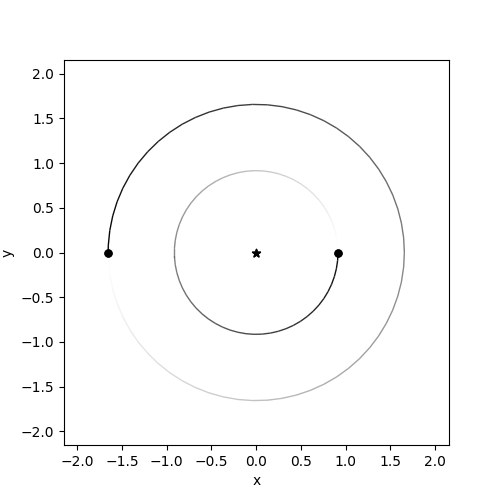

In [122]:
%matplotlib widget

# set up parameters for star
mstar = 1

# set up parameters for planet #1
m1 = 0.001

# set up parameters for planet #2
m2 = 0.001

vcirc = np.sqrt((mstar+m1)/1)

# set up the simulation
sim = rebound.Simulation()
sim.units = ('AU','yr','Msun')
sim.add(m=mstar)                            # first body
sim.add(m=m1, a=0.915, e=0, f=0)                  # second body
sim.add(m=m2, a=1.656, e=0, f=np.pi)                  # second body

#sim.add(m=mu3, x=0.5-mu2, y=np.sqrt(3)/2, vx=0, vy=0) # third body
sim.move_to_com()

# plot the positions and instantaneous orbit
op = rebound.OrbitPlot(sim, periastron=False)

# output info about the particles and the orbit
for p in sim.particles:
    print(p.x, p.y, p.z)
for o in sim.orbits(): 
    print(o)
    print(o.P)

In [123]:
p_orb = sim.orbits()[0].P

Noutputs = 200
times = np.linspace(0, 2*(17/20)*p_orb, Noutputs)

n = 2*np.pi/o.P # mean motion
tau = 0 # time of pericentre passage

M = np.zeros(Noutputs)

# particle 1
xvec1 = np.zeros(Noutputs)
yvec1 = np.zeros(Noutputs)

vxvec1 = np.zeros(Noutputs)
vyvec1 = np.zeros(Noutputs)

xvec1[0] = sim.particles[0].x
yvec1[0] = sim.particles[0].y
op1, = plt.plot(xvec1[:1], yvec1[:1])

# particle 2; in the still reference frame 

xvec2 = np.zeros(Noutputs)
yvec2 = np.zeros(Noutputs)

vxvec2 = np.zeros(Noutputs)
vyvec2 = np.zeros(Noutputs)

theta2 = np.zeros(Noutputs)

xvec2[0] = sim.particles[1].x
yvec2[0] = sim.particles[1].y

op2, = plt.plot(xvec2[:1], yvec2[:1])


# particle 3; in the still reference frame 

xvec3 = np.zeros(Noutputs)
yvec3 = np.zeros(Noutputs)

vxvec3 = np.zeros(Noutputs)
vyvec3 = np.zeros(Noutputs)

theta3 = np.zeros(Noutputs)

xvec3[0] = sim.particles[2].x
yvec3[0] = sim.particles[2].y

op3, = plt.plot(xvec3[:1], yvec3[:1])

# orbital parameters

a1 = np.zeros(Noutputs)
e1 = np.zeros(Noutputs)

a2 = np.zeros(Noutputs)
e2 = np.zeros(Noutputs)


for i, t in enumerate(times):
    # integrate the next part of the orbit
    op.sim.integrate(t)

    M[i] = n*(t - tau)
    
    # store the trajectory of particle 1 (index 0)
    xvec1[i] = sim.particles[0].x
    yvec1[i] = sim.particles[0].y

    vxvec1[i] = sim.particles[0].vx
    vyvec1[i] = sim.particles[0].vy


    # store the trajectory of particle 2 (index 1)
    xvec2[i] = sim.particles[1].x
    yvec2[i] = sim.particles[1].y

    vxvec2[i] = sim.particles[1].vx
    vyvec2[i] = sim.particles[1].vy

    theta2[i] = sim.particles[1].l

    a1[i] = sim.orbits()[0].a
    e1[i] = sim.orbits()[0].e

    # store the trajectory of particle 2 (index 1)
    xvec3[i] = sim.particles[2].x
    yvec3[i] = sim.particles[2].y

    vxvec3[i] = sim.particles[2].vx
    vyvec3[i] = sim.particles[2].vy

    theta3[i] = sim.particles[2].l

    a2[i] = sim.orbits()[1].a
    e2[i] = sim.orbits()[1].e


    # update the plot to animate it
    op.update() # can use updateLimits=True if you want to dynamically update the plot limits
    
    op1.set_data((xvec1[:i+1],yvec1[:i+1])) # plot the trajectory so far
    op2.set_data((xvec2[:i+1],yvec2[:i+1])) 
    op3.set_data((xvec3[:i+1],yvec3[:i+1])) 
    
    time.sleep(0.001)
    op.fig.canvas.draw()

Text(0.5, 1.0, 'longitude')

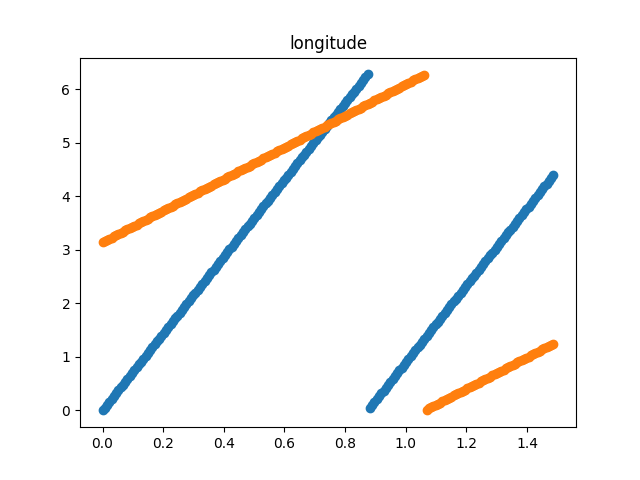

In [124]:
plt.close('all')
plt.scatter(times, theta2)
plt.scatter(times, theta3)
plt.title('longitude')

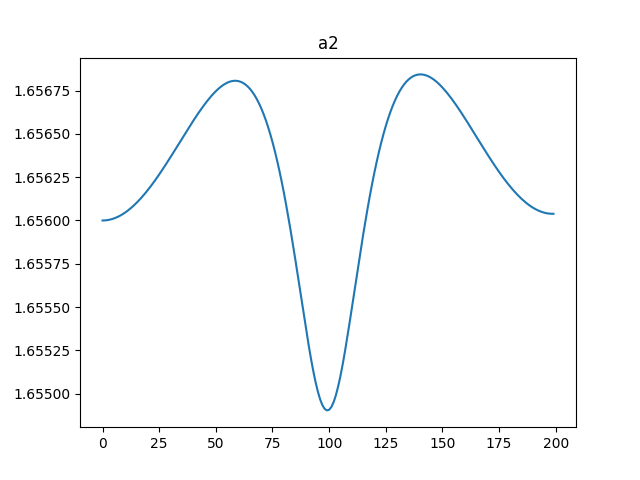

In [125]:
plt.close('all')
plt.title('a2')
plt.plot(a2)

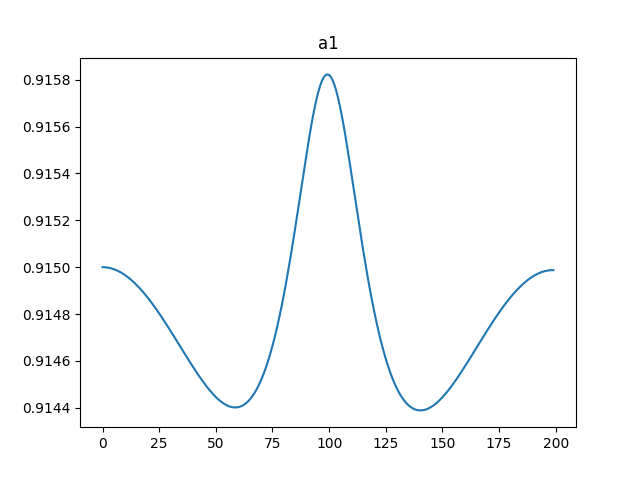

In [126]:
plt.close('all')
plt.title('a1')
plt.plot(a1)

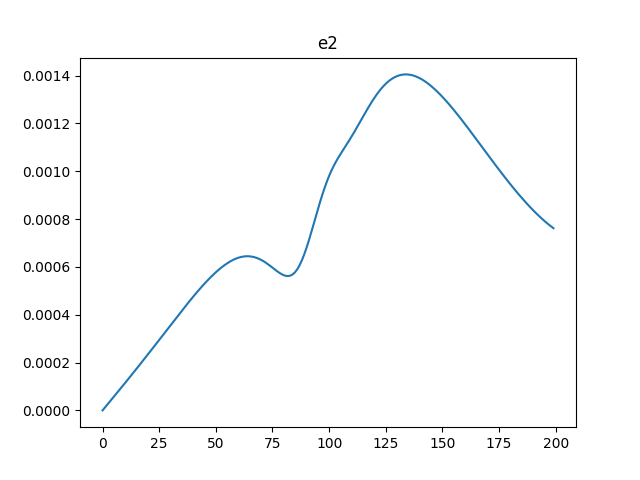

In [129]:
plt.close('all')
plt.title('e2')
plt.plot(e2)

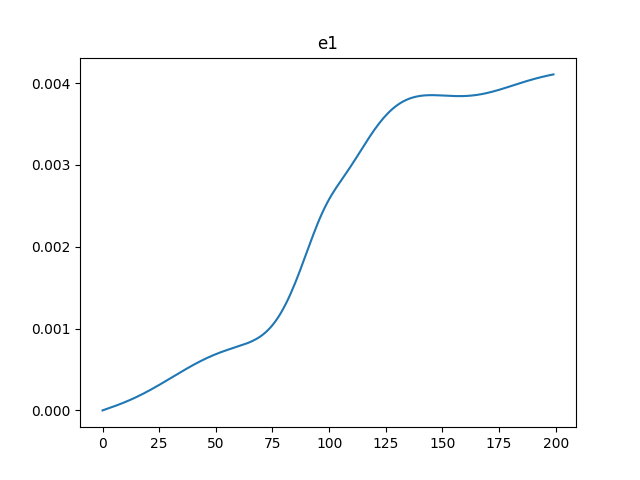

In [127]:
plt.close('all')
plt.title('e1')
plt.plot(e1)

These figures are a replicate of Figure 2

Now, onto Figure 3

-0.00211164935846777 -0.000543622292599506 0.0
0.5420542655336378 0.5436222925995059 0.0
1.5695950929341316 -1.0842021724855044e-19 0.0
<rebound.Orbit instance, a=0.9150000000000001 e=0.2000000000000002 inc=0.0 Omega=0.0 omega=0.0 f=0.7853981633974483>
0.8748282616253508
<rebound.Orbit instance, a=1.6559999999999993 e=0.05122999999999968 inc=0.0 Omega=0.0 omega=0.0 f=0.0>
2.1289469526057867


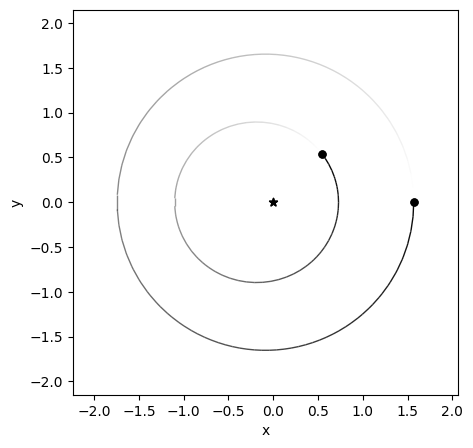

In [2]:
#%matplotlib widget
#plt.close('all')
# set up parameters for star
mstar = 1

# set up parameters for planet #1
m1 = 0.001

# set up parameters for planet #2
m2 = 0.001

vcirc = np.sqrt((mstar+m1)/1)

# set up the simulation
sim = rebound.Simulation()
sim.units = ('AU','yr','Msun')
sim.add(m=mstar)                            # first body
sim.add(m=m1, a=0.915, e=0.2, f=np.pi/4)                  # second body
sim.add(m=m2, a=1.656, e=0.05123, f=0)                  # second body

#sim.add(m=mu3, x=0.5-mu2, y=np.sqrt(3)/2, vx=0, vy=0) # third body
sim.move_to_com()

# plot the positions and instantaneous orbit
op = rebound.OrbitPlot(sim, periastron=False)

# output info about the particles and the orbit
for p in sim.particles:
    print(p.x, p.y, p.z)
for o in sim.orbits(): 
    print(o)
    print(o.P)

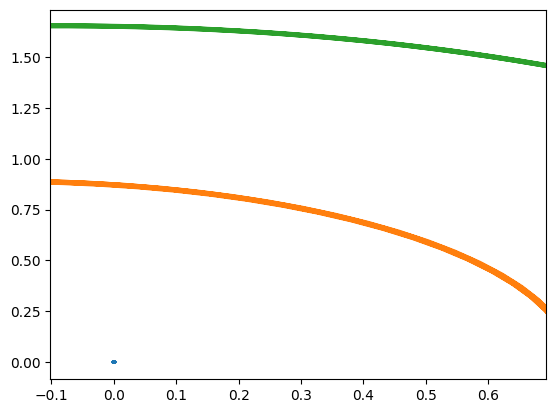

In [5]:
p_orb = sim.orbits()[0].P

Noutputs = 4000
times = np.linspace(0, 40*p_orb, Noutputs)

n = 2*np.pi/p_orb # mean motion
tau = 0 # time of pericentre passage

M = np.zeros(Noutputs)

# particle 1
xvec1 = np.zeros(Noutputs)
yvec1 = np.zeros(Noutputs)

vxvec1 = np.zeros(Noutputs)
vyvec1 = np.zeros(Noutputs)

xvec1[0] = sim.particles[0].x
yvec1[0] = sim.particles[0].y
op1, = plt.plot(xvec1[:1], yvec1[:1])

# particle 2; in the still reference frame 

xvec2 = np.zeros(Noutputs)
yvec2 = np.zeros(Noutputs)

vxvec2 = np.zeros(Noutputs)
vyvec2 = np.zeros(Noutputs)

theta2 = np.zeros(Noutputs)

xvec2[0] = sim.particles[1].x
yvec2[0] = sim.particles[1].y

op2, = plt.plot(xvec2[:1], yvec2[:1])


# particle 3; in the still reference frame 

xvec3 = np.zeros(Noutputs)
yvec3 = np.zeros(Noutputs)

vxvec3 = np.zeros(Noutputs)
vyvec3 = np.zeros(Noutputs)

theta3 = np.zeros(Noutputs)

xvec3[0] = sim.particles[2].x
yvec3[0] = sim.particles[2].y

op3, = plt.plot(xvec3[:1], yvec3[:1])

# orbital parameters

a1 = np.zeros(Noutputs)
e1 = np.zeros(Noutputs)

a2 = np.zeros(Noutputs)
e2 = np.zeros(Noutputs)


for i, t in enumerate(times):
    # integrate the next part of the orbit
    op.sim.integrate(t)

    M[i] = n*(t - tau)
    
    # store the trajectory of particle 1 (index 0)
    xvec1[i] = sim.particles[0].x
    yvec1[i] = sim.particles[0].y

    vxvec1[i] = sim.particles[0].vx
    vyvec1[i] = sim.particles[0].vy


    # store the trajectory of particle 2 (index 1)
    xvec2[i] = sim.particles[1].x
    yvec2[i] = sim.particles[1].y

    vxvec2[i] = sim.particles[1].vx
    vyvec2[i] = sim.particles[1].vy

    theta2[i] = sim.particles[1].l

    a1[i] = sim.orbits()[0].a
    e1[i] = sim.orbits()[0].e

    # store the trajectory of particle 2 (index 1)
    xvec3[i] = sim.particles[2].x
    yvec3[i] = sim.particles[2].y

    vxvec3[i] = sim.particles[2].vx
    vyvec3[i] = sim.particles[2].vy

    theta3[i] = sim.particles[2].l

    a2[i] = sim.orbits()[1].a
    e2[i] = sim.orbits()[1].e


    # update the plot to animate it
    op.update() # can use updateLimits=True if you want to dynamically update the plot limits
    
    op1.set_data((xvec1[:i+1],yvec1[:i+1])) # plot the trajectory so far
    op2.set_data((xvec2[:i+1],yvec2[:i+1])) 
    op3.set_data((xvec3[:i+1],yvec3[:i+1])) 
    
    time.sleep(0.001)
    op.fig.canvas.draw()

Text(0.5, 0, 'time (yr)')

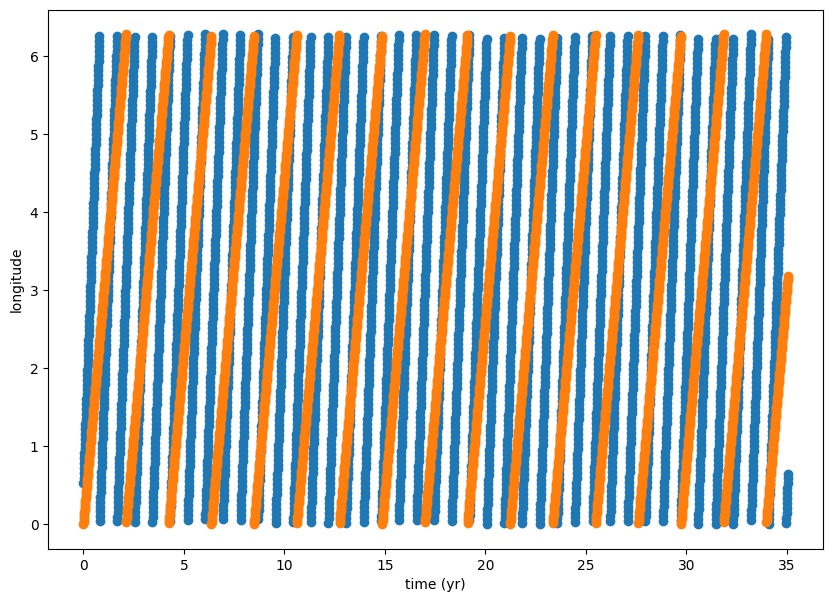

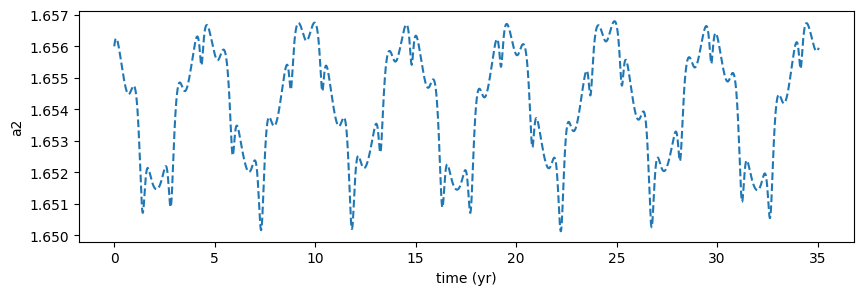

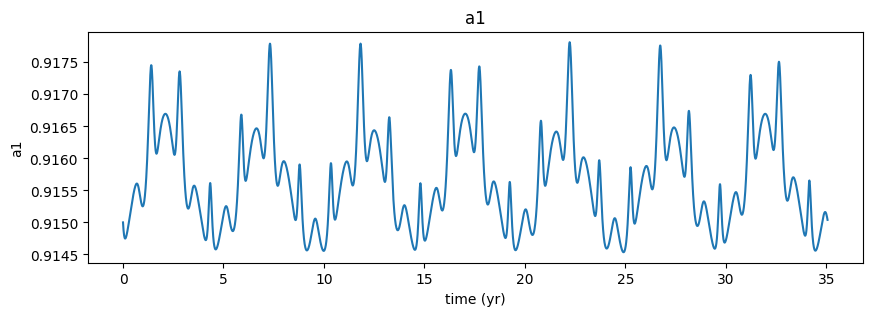

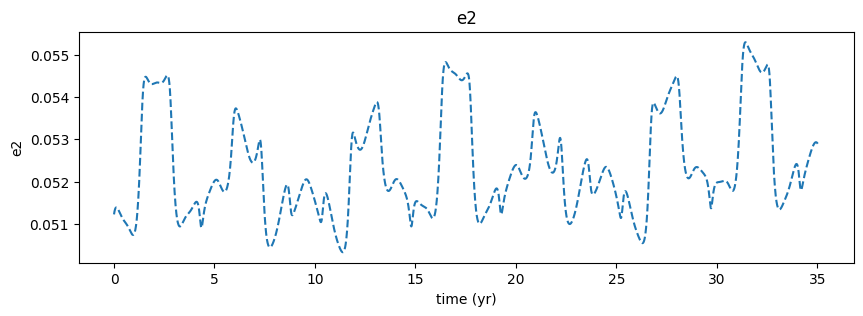

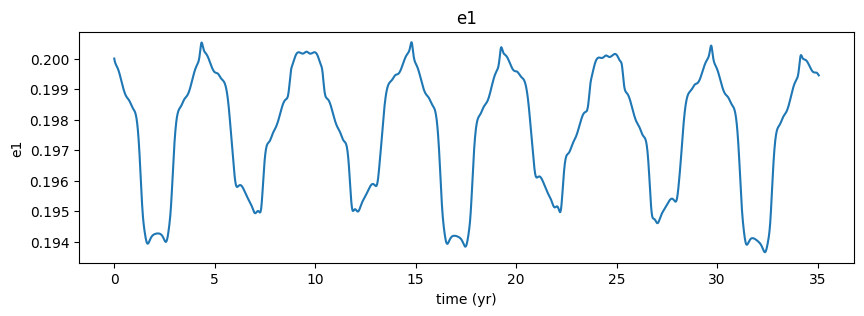

In [6]:

plt.figure(0, figsize=(10,7))
plt.scatter(times, theta2)
plt.scatter(times, theta3)
plt.ylabel('longitude')
plt.xlabel('time (yr)')

plt.figure(1, figsize=(10,3))
plt.plot(times, a2, '--')
plt.ylabel('a2')
plt.xlabel('time (yr)')



plt.figure(2, figsize=(10,3))
plt.title('a1')
plt.plot(times, a1)
plt.ylabel('a1')
plt.xlabel('time (yr)')

plt.figure(3, figsize=(10,3))
plt.title('e2')
plt.plot(times, e2, '--')
plt.ylabel('e2')
plt.xlabel('time (yr)')

plt.figure(4, figsize=(10,3))
plt.title('e1')
plt.plot(times, e1)
plt.ylabel('e1')
plt.xlabel('time (yr)')

Figure 4

-0.00211164935846777 -0.000543622292599506 0.0
0.5420542655336378 0.5436222925995059 0.0
1.5695950929341316 -1.0842021724855044e-19 0.0
<rebound.Orbit instance, a=0.9150000000000001 e=0.2000000000000002 inc=0.0 Omega=0.0 omega=0.0 f=0.7853981633974483>
0.8748282616253508
<rebound.Orbit instance, a=1.6559999999999993 e=0.05122999999999968 inc=0.0 Omega=0.0 omega=0.0 f=0.0>
2.1289469526057867


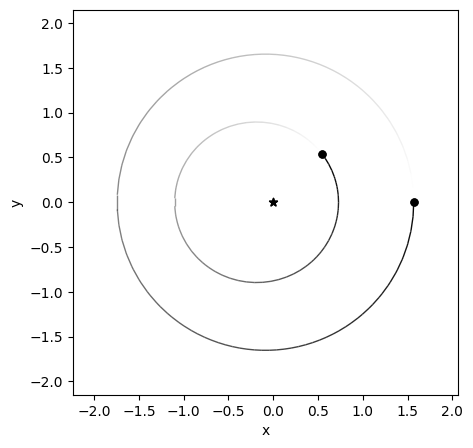

In [7]:
#%matplotlib widget
#plt.close('all')
# set up parameters for star
mstar = 1

# set up parameters for planet #1
m1 = 0.001

# set up parameters for planet #2
m2 = 0.001

vcirc = np.sqrt((mstar+m1)/1)

# set up the simulation
sim = rebound.Simulation()
sim.units = ('AU','yr','Msun')
sim.add(m=mstar)                            # first body
sim.add(m=m1, a=0.915, e=0.2, f=np.pi/4)                  # second body
sim.add(m=m2, a=1.656, e=0.05123, f=0)                  # second body

#sim.add(m=mu3, x=0.5-mu2, y=np.sqrt(3)/2, vx=0, vy=0) # third body
sim.move_to_com()

# plot the positions and instantaneous orbit
op = rebound.OrbitPlot(sim, periastron=False)

# output info about the particles and the orbit
for p in sim.particles:
    print(p.x, p.y, p.z)
for o in sim.orbits(): 
    print(o)
    print(o.P)

In [13]:
for o in sim.orbits():
    print(o)

<rebound.Orbit instance, a=0.9150000000000001 e=0.2000000000000002 inc=0.0 Omega=0.0 omega=0.0 f=0.7853981633974483>
<rebound.Orbit instance, a=1.6559999999999993 e=0.05122999999999968 inc=0.0 Omega=0.0 omega=0.0 f=0.0>
